In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt

### Collect Follower Growth Data using Social Blade API

In [36]:
df1 = pd.read_csv(r"G:\ig\data_did.csv")
# len(df1.brand.unique().tolist())  202 brands
l = df1.brand.unique().tolist()
l.remove('nike')
l.remove('balmain')
# len(l) 202

In [44]:
import requests
for e in l:
    print(e, l.index(e))
    if os.path.exists(r"G:\ig\brands_stats_growth\{}.json".format(e)):
        print("Already existed")
    else:
        headers = {
            'query': e,
            'history': 'vault',
            'clientid': 'cli_ceb00bbd51f2d953728c6124',
            'token': '955bae71750ca7cc869bd9b0ac4f8a3df39edb1428940961746c9e3311fcf60e9e9455e7aa796f665ed88ab4b0a6912ee9a55ca773fc2b1c9677a52fc2df02e6',
        }

        response = requests.get('https://matrix.sbapis.com/b/instagram/statistics', headers=headers)
        with open(r"G:\ig\brands_stats_growth\{}.json".format(headers['query']), 'w') as f:
            json.dump(response.json(), f)

bvlgari 0


### Combine Follower Growth Data into One Dataframe

In [63]:
results = pd.DataFrame()
for i in os.listdir(r"G:\ig\brands_stats_growth"):
    #print(i)
    try:
        with open(r"G:\ig\brands_stats_growth\{}".format(i), 'r') as file:
            data = json.load(file)
        df = pd.DataFrame(data['data']['daily'])
        df['brand'] = i.split('.json')[0]
        results = pd.concat([results, df])
    except:
        print(i, "Failed")

emporioarmani.json Failed
louboutinworld.json Failed


In [68]:
results.to_csv(r"G:\ig\brands_stats_growth.csv")

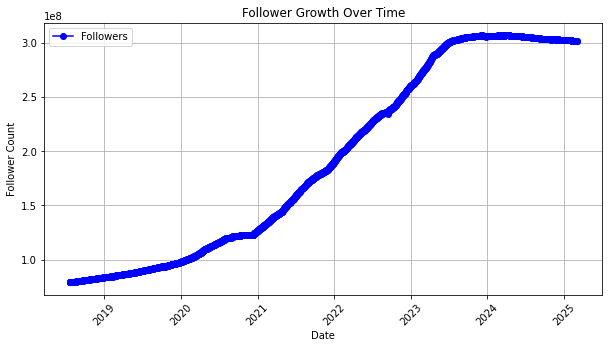

In [56]:

df = pd.DataFrame(data['data']['daily'])
df["date"] = pd.to_datetime(df["date"])

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["followers"], marker="o", linestyle="-", color="b", label="Followers")

# Formatting
plt.xlabel("Date")
plt.ylabel("Follower Count")
plt.title("Follower Growth Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Post Data Aggregate

In [101]:
df = pd.read_csv(r"G:\ig\total_posts_summary.csv")
df1 = pd.read_csv(r"G:\ig\data_did.csv")
df1 = df1[['id','authors','solo_author']]
df = df.drop(['affiliates', 'sponsored', 'ads'], axis=1)
df = df.merge(df1, on = 'id', how = 'left')
df[['authors', 'solo_author']] = df[['authors', 'solo_author']].fillna(0)
df['collab_posts'] = np.where(df['authors'] == 0, 0, 1)
df = df.drop(['solo_author'], axis=1)

In [103]:
df.to_csv(r"G:\ig\total_posts_summary_total.csv")

### Image Features Aggregation

In [69]:
f1 = pd.read_csv(r"G:\ig\features\clip_stats.csv")
f1['id'] = f1['image'].apply(lambda x: x.split('/')[-1].split('_')[0])
f1 = f1.groupby(['id'])['clip'].agg(['mean','first']).reset_index()
f1 = f1.rename(columns={'mean':'clip_mean','first':'clip_first'})

In [32]:
f2 = pd.read_csv(r"G:\ig\features\deepface_stats.csv")
f2['id'] = f2['image'].apply(lambda x: x.split('/')[-1].split('_')[0])
f2 = f2.groupby(['id'])[['num_faces', 'age', 'gender', 'race', 'emotion']].agg(['first'])
f2.columns = ['_'.join(col) for col in f2.columns]
f2 = f2.reset_index()

In [46]:
f3 = pd.read_csv(r"G:\ig\features\image_stats.csv")
f3['id'] = f3['image'].apply(lambda x: x.split('/')[-1].split('_')[0])
f3 = f3.groupby(['id'])[['warm_hue', 'saturation', 'brightness', 'contrast', 'clarity']].agg(['first', 'mean'])
f3.columns = ['_'.join(col) for col in f3.columns]
f3 = f3.reset_index()

In [51]:
f4 = pd.read_csv(r"G:\ig\features\nima_stats.csv")
f4['id'] = f4['image'].apply(lambda x: x.split('/')[-1].split('_')[0])
f4 = f4.groupby(['id'])[['nima', 'nima_std']].agg(['first', 'mean'])
f4.columns = ['_'.join(col) for col in f4.columns]
f4 = f4.reset_index()

In [53]:
f5 = pd.read_csv(r"G:\ig\features\scene_stats.csv")

In [64]:
f1.shape

(221917, 3)

In [65]:
f2.shape

(114653, 5)

In [59]:
f3.shape

(221917, 11)

In [60]:
f4.shape

(221917, 5)

In [70]:
f1

,id,clip_mean,clip_first
0,2476645995304392912,0.312012,0.312012
1,2476647015963233962,0.278320,0.278320
2,2476655322917515850,0.331299,0.331299
3,2476661979521952528,0.249023,0.249023
4,2476676978023942367,0.254150,0.254150
...,...,...,...
221912,3356976567296853712,0.250488,0.250488
221913,3356976886518623470,0.255371,0.255371
221914,3356991931573430005,0.228841,0.234009
221915,3357020881778925605,0.235107,0.220337


In [72]:
features = f1.merge(f3, on = 'id', how = 'inner').merge(f4, on = 'id', how = 'inner')

In [77]:
features.to_csv(r"G:\ig\features.csv")

### text Feature Aggregate

In [110]:
results = pd.DataFrame()
for i in os.listdir(r"G:\ig\post_text_features"):          
    #print(i)
    t = pd.read_csv(r"G:\ig\post_text_features\{}".format(i))
    t = t[['id', 'brands',
        'token_length_mean', 'token_length_median', 'token_length_std',
        'sentence_length_mean', 'sentence_length_median', 'sentence_length_std',
        'syllables_per_token_mean', 'syllables_per_token_median',
        'syllables_per_token_std', 'n_tokens', 'n_unique_tokens',
        'proportion_unique_tokens', 'n_characters', 'n_sentences', 'entropy',
        'perplexity', 'per_word_perplexity', 'first_order_coherence',
        'second_order_coherence', 'passed_quality_check', 'n_stop_words',
        'alpha_ratio', 'mean_word_length', 'doc_length',
        'symbol_to_word_ratio_#', 'proportion_ellipsis',
        'proportion_bullet_points', 'contains_lorem ipsum',
        'duplicate_line_chr_fraction', 'duplicate_paragraph_chr_fraction',
        'duplicate_ngram_chr_fraction_5', 'duplicate_ngram_chr_fraction_6',
        'duplicate_ngram_chr_fraction_7', 'duplicate_ngram_chr_fraction_8',
        'duplicate_ngram_chr_fraction_9', 'duplicate_ngram_chr_fraction_10',
        'top_ngram_chr_fraction_2', 'top_ngram_chr_fraction_3',
        'top_ngram_chr_fraction_4', 'oov_ratio', 'flesch_reading_ease',
        'flesch_kincaid_grade', 'smog', 'gunning_fog',
        'automated_readability_index', 'coleman_liau_index', 'lix', 'rix',
        'dependency_distance_mean', 'dependency_distance_std',
        'prop_adjacent_dependency_relation_mean',
        'prop_adjacent_dependency_relation_std', 'pos_prop_ADJ', 'pos_prop_ADP',
        'pos_prop_ADV', 'pos_prop_AUX', 'pos_prop_CCONJ', 'pos_prop_DET',
        'pos_prop_INTJ', 'pos_prop_NOUN', 'pos_prop_NUM', 'pos_prop_PART',
        'pos_prop_PRON', 'pos_prop_PROPN', 'pos_prop_PUNCT', 'pos_prop_SCONJ',
        'pos_prop_SYM', 'pos_prop_VERB', 'pos_prop_X']]
    results = pd.concat([results, t])

C:\Users\tun64385\AppData\Local\Temp\ipykernel_70712\3530436479.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  t = pd.read_csv(r"G:\ig\post_text_features\{}".format(i))
C:\Users\tun64385\AppData\Local\Temp\ipykernel_70712\3530436479.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  t = pd.read_csv(r"G:\ig\post_text_features\{}".format(i))
C:\Users\tun64385\AppData\Local\Temp\ipykernel_70712\3530436479.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  t = pd.read_csv(r"G:\ig\post_text_features\{}".format(i))
C:\Users\tun64385\AppData\Local\Temp\ipykernel_70712\3530436479.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  t = pd.read_csv(r"G:\ig\post_text_features\{}".format(i))
C:\Users\tun64385\AppData\Local\Temp\ipykernel_70712\3530436479.py:4: DtypeWarni

In [112]:
results.to_csv(r"G:\ig\posts_text_summary.csv")

In [132]:
results[results.id == '1488471764162210456']

,id,brands,token_length_mean,token_length_median,token_length_std,sentence_length_mean,sentence_length_median,sentence_length_std,syllables_per_token_mean,syllables_per_token_median,...,pos_prop_NOUN,pos_prop_NUM,pos_prop_PART,pos_prop_PRON,pos_prop_PROPN,pos_prop_PUNCT,pos_prop_SCONJ,pos_prop_SYM,pos_prop_VERB,pos_prop_X
237,1488471764162210456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
results[results.brands.isnull()]

,id,brands,token_length_mean,token_length_median,token_length_std,sentence_length_mean,sentence_length_median,sentence_length_std,syllables_per_token_mean,syllables_per_token_median,...,pos_prop_NOUN,pos_prop_NUM,pos_prop_PART,pos_prop_PRON,pos_prop_PROPN,pos_prop_PUNCT,pos_prop_SCONJ,pos_prop_SYM,pos_prop_VERB,pos_prop_X
237,1488471764162210456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080,1528456621021077308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6773,768789395841752968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,1511097576162043319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,1518955102563856892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,1608781792607881884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2733,1526884335087522914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3297,1621922875789465726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,1316815663549064244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merge features with DID data

In [149]:
df = pd.read_csv(r"G:\ig\total_posts_summary_total.csv", index_col = 0)
temp = df.groupby(['brand'])['collab_posts'].sum().reset_index()
control = temp.loc[temp.collab_posts == 0,'brand'].tolist()
df_control = df[df.brand.isin(control)]
df_control['treated'] = 0
treated = temp.loc[temp.collab_posts != 0,'brand'].tolist()
df_treat = df[df.brand.isin(treated) & df.collab_posts == 1]
df_treat['treated'] = 1
final = pd.concat([df_control, df_treat])
final = final[['id', 'create_date', 'likes','comments','description','brand','collection_date','authors', 'collab_posts', 'treated']]
final = final[final.brand != 'kfc'] # (84106, 10)

C:\Users\tun64385\AppData\Local\Temp\ipykernel_70712\1855584917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['treated'] = 0
C:\Users\tun64385\AppData\Local\Temp\ipykernel_70712\1855584917.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treat['treated'] = 1


In [150]:
final.id = final.id.astype(str)
results.id = results.id.astype(str)
final = final.merge(results, on = 'id', how = 'left')

In [151]:
features = pd.read_csv(r"G:\ig\features.csv", index_col = 0)
final.id = final.id.astype(str)
features.id = features.id.astype(str)

In [152]:
features

,id,clip_mean,clip_first,warm_hue_first,warm_hue_mean,saturation_first,saturation_mean,brightness_first,brightness_mean,contrast_first,contrast_mean,clarity_first,clarity_mean,nima_first,nima_mean,nima_std_first,nima_std_mean
0,2476645995304392912,0.312012,0.312012,0.981118,0.981118,0.514153,0.514153,0.709923,0.709923,0.180097,0.180097,0.686583,0.686583,4.163422,4.163422,1.690680,1.690680
1,2476647015963233962,0.278320,0.278320,0.983596,0.983596,0.233478,0.233478,0.373892,0.373892,0.247193,0.247193,0.161016,0.161016,4.448695,4.448695,1.635514,1.635514
2,2476655322917515850,0.331299,0.331299,0.889194,0.889194,0.295999,0.295999,0.789842,0.789842,0.172665,0.172665,0.772608,0.772608,4.889386,4.889386,1.638347,1.638347
3,2476661979521952528,0.249023,0.249023,0.586067,0.586067,0.394364,0.394364,0.330216,0.330216,0.318772,0.318772,0.190351,0.190351,4.417182,4.417182,1.925747,1.925747
4,2476676978023942367,0.254150,0.254150,0.398476,0.398476,0.201113,0.201113,0.682312,0.682312,0.224886,0.224886,0.521415,0.521415,4.881803,4.881803,1.652920,1.652920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221912,3356976567296853712,0.250488,0.250488,0.092794,0.092794,0.313900,0.313900,0.589266,0.589266,0.373800,0.373800,0.536968,0.536968,4.409199,4.409199,1.635848,1.635848
221913,3356976886518623470,0.255371,0.255371,1.000000,1.000000,0.000000,0.000000,0.617235,0.617235,0.253732,0.253732,0.562831,0.562831,4.436592,4.436592,1.877687,1.877687
221914,3356991931573430005,0.228841,0.234009,0.827765,0.637292,0.312057,0.352723,0.622991,0.555631,0.246888,0.263114,0.458942,0.342850,4.872393,4.991694,1.645432,1.686767
221915,3357020881778925605,0.235107,0.220337,0.984357,0.969625,0.182538,0.319569,0.683532,0.560210,0.193178,0.252747,0.471975,0.363188,4.204703,4.368232,1.702437,1.714400


In [153]:
final = final.merge(features, on = 'id', how = 'left')

In [157]:
final = final[final['brightness_first'].notna()] 

In [159]:
final.create_date = pd.to_datetime(final.create_date)

C:\Users\tun64385\AppData\Local\Temp\ipykernel_70712\2425258666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.create_date = pd.to_datetime(final.create_date)


In [163]:
final = final[final.create_date >= '2019-01-01']

In [164]:
final.to_csv(r"G:\ig\temp_data_did.csv")

## Get final data: merge the features data with follower growth data

In [166]:
df = pd.read_csv(r"G:\ig\brands_stats_growth.csv", index_col = 0)

In [167]:
df

,date,followers,following,media,avg_likes,avg_comments,brand
0,2025-03-02,302065779,214,1557,93719.9,943.312,nike
1,2025-03-01,302069752,214,1557,92071.6,929.500,nike
2,2025-02-28,302083747,214,1556,101886.0,987.938,nike
3,2025-02-27,302095167,214,1555,101526.0,979.562,nike
4,2025-02-26,302109892,214,1554,101129.0,976.562,nike
...,...,...,...,...,...,...,...
2320,2018-07-24,6087763,47,2566,22864.5,143.360,bvlgari
2321,2018-07-23,6082758,47,2565,22424.9,142.240,bvlgari
2322,2018-07-22,6078291,47,2564,22628.5,143.840,bvlgari
2323,2018-07-21,6072978,47,2562,21925.1,141.560,bvlgari


In [135]:
df.id = df.id.astype(str)
df[df.id == '1488471764162210456']

,id,shortcode,create_date,caption,likes,comments,description,brand,meta_file_path,collection_date,authors,collab_posts
461169,1488471764162210456,BSoHS7pFmqY,2017-04-08 13:54:43,NaN,108779.0,470.0,Time to rise. #Futurecraft,adidas,/mnt/g/ig/meta/adidas/1488471764162210456,2024-05-04,0.0,0


In [3]:
df = pd.read_csv('/Users/eryaouyang/Dropbox/socialmedia_ads/data/images_only_did.csv', index_col = 0)

In [6]:
df = df.drop('description', axis = 1)

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [8]:
df.to_csv('/Users/eryaouyang/Dropbox/socialmedia_ads/data/images_only_did.csv')